# CSC 177 Data Preprocessing Project


In [4]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from graphviz import Digraph

In [5]:
# Import data
data = pd.read_csv("north.csv")
print(f"Number of instances = {data.shape[0]}")
print(f"Number of attributes = {data.shape[1]}")
data.head()

Number of instances = 8392320
Number of attributes = 27


,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


### Translate the column names

This is done first in order to make preprocessing easier (by knowing what the columns mean).


In [6]:
print(f"Before translating names: \n{list(data.columns[1:5])}",)
data.columns = ['index', 'Date', 'Time', 'TOTAL RAINFALL, TIME (mm)',
               'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)',
               'MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB)',
               'MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB)',
               'GLOBAL RADIATION (Kj/m²)',
               'AIR TEMPERATURE - DRY BULB, TIME (°C)',
               'DEW POINT TEMPERATURE (°C)',
               'MAXIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)',
               'MINIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)',
               'TEMPERATURE DEW MAX. AT THE PREVIOUS TIME. (AUT) (°C)',
               'DEW TEMPERATURE MIN. AT THE PREVIOUS TIME. (AUT) (°C)',
               'REL. HUMIDITY MAX. AT THE PREVIOUS TIME. (AUT) (%)',
               'REL. HUMIDITY MIN. AT THE PREVIOUS TIME. (AUT) (%)',
               'AIR RELATIVE HUMIDITY, HOURLY (%)',
               'WIND, TIMED DIRECTION (gr) (° (gr))', 'WIND, MAXIMUM gust (m/s)',
               'WIND, HOURLY SPEED (m/s)', 'region', 'state', 'station',
               'station_code', 'latitude', 'longitude', 'height'
               ]
print(f"After: \n{list(data.columns[1:5])}")
data.head()

Before translating names: 
['Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']
After: 
['Date', 'Time', 'TOTAL RAINFALL, TIME (mm)', 'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)']


,index,Date,Time,"TOTAL RAINFALL, TIME (mm)","ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)",MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB),MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB),GLOBAL RADIATION (Kj/m²),"AIR TEMPERATURE - DRY BULB, TIME (°C)",DEW POINT TEMPERATURE (°C),...,"WIND, TIMED DIRECTION (gr) (° (gr))","WIND, MAXIMUM gust (m/s)","WIND, HOURLY SPEED (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


### Dropping Fields

Then, drop fields that are of no value for our purpose.


In [7]:
print(f"Before drop (first five): \n{list(data.columns[:5])}")
data.drop(["index",
           "Time", 
           "station",
           "station_code",
           "latitude",
           "longitude",
           "MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB)",
           "MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB)",
           "GLOBAL RADIATION (Kj/m²)",
           "AIR TEMPERATURE - DRY BULB, TIME (°C)",
           "MINIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)",
           "MAXIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)",
           "ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)",
           "TEMPERATURE DEW MAX. AT THE PREVIOUS TIME. (AUT) (°C)",
           "DEW TEMPERATURE MIN. AT THE PREVIOUS TIME. (AUT) (°C)",
           "REL. HUMIDITY MAX. AT THE PREVIOUS TIME. (AUT) (%)",
           "REL. HUMIDITY MIN. AT THE PREVIOUS TIME. (AUT) (%)",
           "AIR RELATIVE HUMIDITY, HOURLY (%)",
           "region",
          ], axis=1, inplace=True)
print(f"After drop: \n{list(data.columns)}")
data.head()

Before drop (first five): 
['index', 'Date', 'Time', 'TOTAL RAINFALL, TIME (mm)', 'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)']
After drop: 
['Date', 'TOTAL RAINFALL, TIME (mm)', 'DEW POINT TEMPERATURE (°C)', 'WIND, TIMED DIRECTION (gr) (° (gr))', 'WIND, MAXIMUM gust (m/s)', 'WIND, HOURLY SPEED (m/s)', 'state', 'height']


,Date,"TOTAL RAINFALL, TIME (mm)",DEW POINT TEMPERATURE (°C),"WIND, TIMED DIRECTION (gr) (° (gr))","WIND, MAXIMUM gust (m/s)","WIND, HOURLY SPEED (m/s)",state,height
0,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
1,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
2,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
3,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
4,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25


### Data Quality

A large number of values in the dataset are set to -9999. Make sure those are removed first before doing any other preprocessing.


In [8]:
print(f"Number of rows that before -9999: {data.shape[0]}")
data = data[(data["TOTAL RAINFALL, TIME (mm)"] != -9999.0)]
data = data[(data["DEW POINT TEMPERATURE (°C)"] != -9999.0)]
data = data[(data["WIND, TIMED DIRECTION (gr) (° (gr))"] != -9999.0)]
data = data[(data["WIND, MAXIMUM gust (m/s)"] != -9999.0)]
data = data[(data["WIND, HOURLY SPEED (m/s)"] != -9999.0)]
data = data[(data["height"] != -9999.0)]
print(f"Number of rows that after removing -9999: {data.shape[0]}")

Number of rows that before -9999: 8392320
Number of rows that after removing -9999: 5903974


### Sampling

This dataset is much bigger than what is needed for our purposes. Let's shrink this down early so we can improve speed.


In [9]:
print(f"Number of rows before sampling: {data.shape[0]}")
data = data.sample(frac=0.01, random_state=1)
print(f"Number of rows after sampling: {data.shape[0]}")

Number of rows before sampling: 5903974
Number of rows after sampling: 59040


### Delete Duplicate Values

Next, delete duplicate values to avoid processing false data.


In [10]:
dupes = data.duplicated()
print(f"Number of duplicate rows = {dupes.sum()}")

Number of duplicate rows = 0


We don't actually have duplicate rows for our case, since there is a unique date field in each row. This is the following result if we set the first 500 rows to be duplicated


In [11]:
dupes = data.copy()
print(f"Number of rows before discarding duplicates = {dupes.shape[0]}")
dupes.iloc[:500] = dupes.iloc[-1]
dupes = dupes.drop_duplicates()
print(f"Number of rows after discarding duplicates = {dupes.shape[0]}")

Number of rows before discarding duplicates = 59040
Number of rows after discarding duplicates = 58540


### Replace Missing Values

Do this now so we are not messing around with missing data, possibly getting false results. In our case, we have no missing values, so we are good here.


In [12]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 59040
Number of attributes = 8
Number of missing values:
	Date: 0
	TOTAL RAINFALL, TIME (mm): 0
	DEW POINT TEMPERATURE (°C): 0
	WIND, TIMED DIRECTION (gr) (° (gr)): 0
	WIND, MAXIMUM gust (m/s): 0
	WIND, HOURLY SPEED (m/s): 0
	state: 0
	height: 0


Since we don't have any missing values, let's see what it would be like if we did.


In [13]:
missing_data = data["DEW POINT TEMPERATURE (°C)"].iloc[:10]

# Insert "missing" data
missing_data[2], missing_data[4] = "?", "?"        
missing_data = missing_data.replace("?", np.NaN)
print(f"Before missing data: \n\n{missing_data}\n")

missing_data = missing_data.fillna(missing_data.median())

print(f"After replacing missing values: \n\n{missing_data}")

Before missing data: 

7019044    23.5
1922446    22.8
5081799    17.8
5653236    22.9
633624     22.1
3752018    21.3
499902     22.8
1904786    23.8
5467555    22.7
1888731    20.3
2           NaN
4           NaN
Name: DEW POINT TEMPERATURE (°C), dtype: float64

After replacing missing values: 

7019044    23.50
1922446    22.80
5081799    17.80
5653236    22.90
633624     22.10
3752018    21.30
499902     22.80
1904786    23.80
5467555    22.70
1888731    20.30
2          22.75
4          22.75
Name: DEW POINT TEMPERATURE (°C), dtype: float64


### Outliers

Now that we're done cleaning up the messy data, let's move on to removing outliers, since those may alter our results in a negative manner.


<AxesSubplot: >

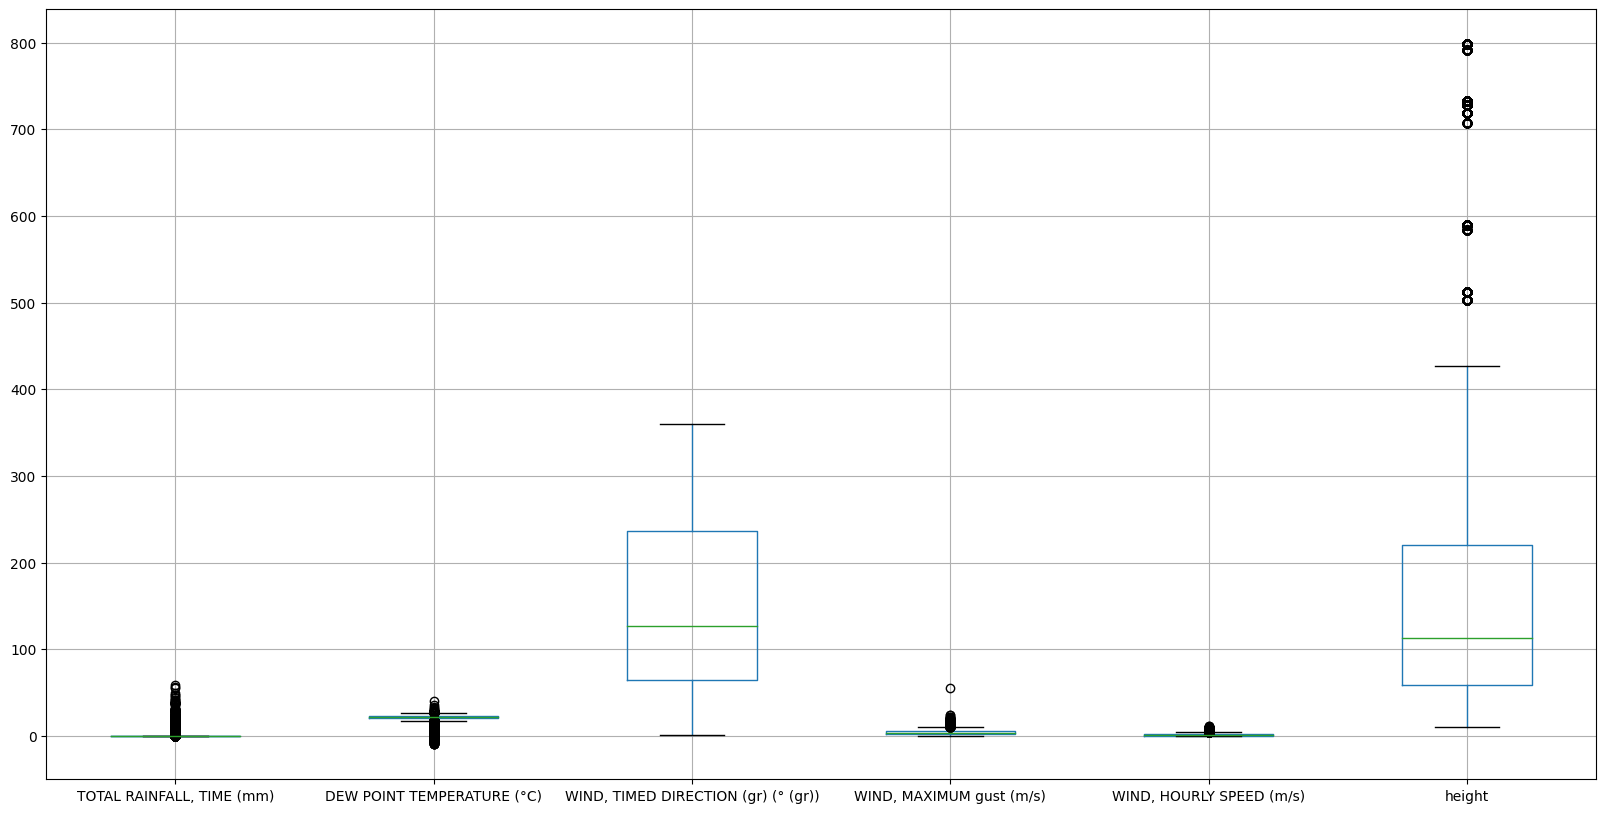

In [14]:
%matplotlib inline

data.boxplot(figsize=(20, 10))

There are outliers in the first, second, fourth, fifth and sixth fields, but we'll ignore those in `TOTAL RAINFALL, TIME (mm)` since a majority of those are caused by a rainfall time of 0 (which is normal)


In [15]:
print(f"Number of rows before discarding outliers: {data.shape[0]}")
# Remove outliers that have a zscore > 3 or < -3
data = data[(np.abs(stats.zscore(data["DEW POINT TEMPERATURE (°C)"])) < 3)]
data = data[(np.abs(stats.zscore(data["WIND, MAXIMUM gust (m/s)"])) < 3)]
data = data[(np.abs(stats.zscore(data["WIND, HOURLY SPEED (m/s)"])) < 3)]
data = data[(np.abs(stats.zscore(data["height"])) < 3)]

print(f"Number of rows before discarding outliers: {data.shape[0]}")

Number of rows before discarding outliers: 59040
Number of rows before discarding outliers: 54878


### Discretization

We can get a better idea of the data by using discretization. This is one of the last steps since we've filtered out most of the bad data.


<AxesSubplot: >

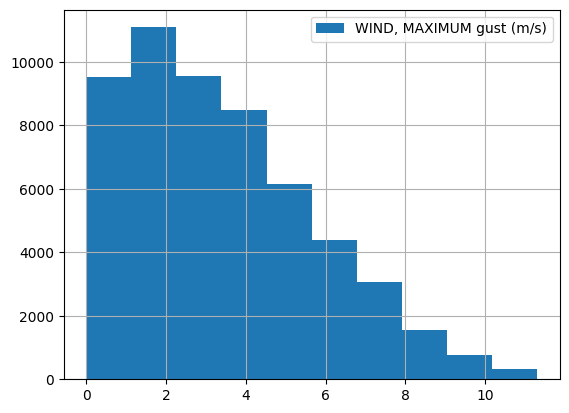

In [16]:
data["WIND, MAXIMUM gust (m/s)"].hist(legend=True) # defaults to 10 bins

Also using methods such as `cut()` and `qcut()` help us to see the frequency of the data.


In [17]:
bins = pd.cut(data["WIND, MAXIMUM gust (m/s)"],4)
bins.value_counts(sort=False)

(-0.0113, 2.825]    26053
(2.825, 5.65]       18756
(5.65, 8.475]        8265
(8.475, 11.3]        1804
Name: WIND, MAXIMUM gust (m/s), dtype: int64

In [18]:
bins = pd.qcut(data["WIND, MAXIMUM gust (m/s)"],4)
bins.value_counts(sort=False)

(-0.001, 1.6]    14660
(1.6, 3.0]       13162
(3.0, 5.0]       13889
(5.0, 11.3]      13167
Name: WIND, MAXIMUM gust (m/s), dtype: int64

### Principal Component Analysis

This can be done the same time as discretization. Let's see if the attributes of wind and dew point temperature have a correlation in two different states (Amazonas and Pará).


In [19]:
features = ["WIND, MAXIMUM gust (m/s)", "DEW POINT TEMPERATURE (°C)"]
x = data.loc[:, features].values
y = data.loc[:,['state']].values
x = StandardScaler().fit_transform(x)

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,-1.199591,0.161653
1,0.041197,-0.669172
2,1.061433,1.238898
3,-0.047275,-0.639266
4,-0.671250,0.453238


In [21]:
pca_data = pd.concat([principalDf, data["state"]], axis = 1)

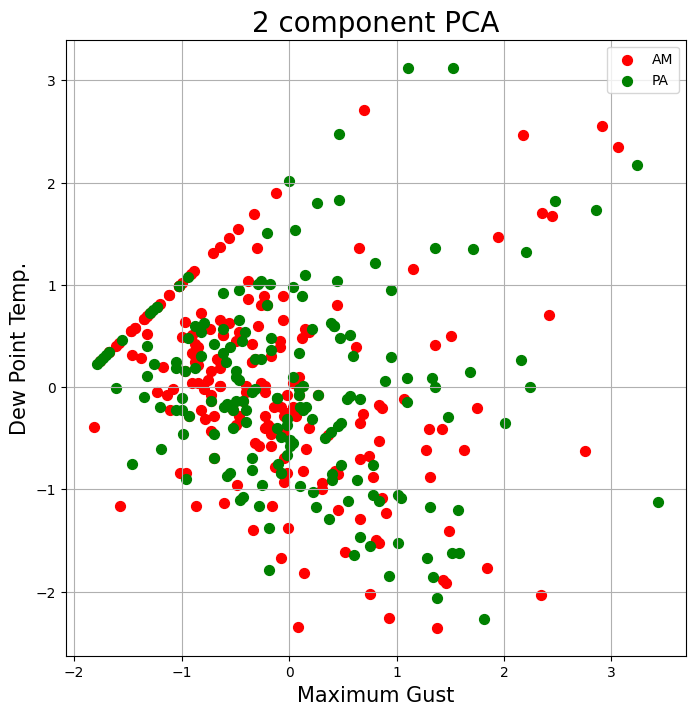

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Maximum Gust', fontsize = 15)
ax.set_ylabel('Dew Point Temp.', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['AM', 'PA']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_data['state'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'pc1']
               , pca_data.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Aggregation

This can be done the same time as the two before to help visualize the data.


Text(0.5, 1.0, 'Monthly Rainfall (variance = 2552.6301)')

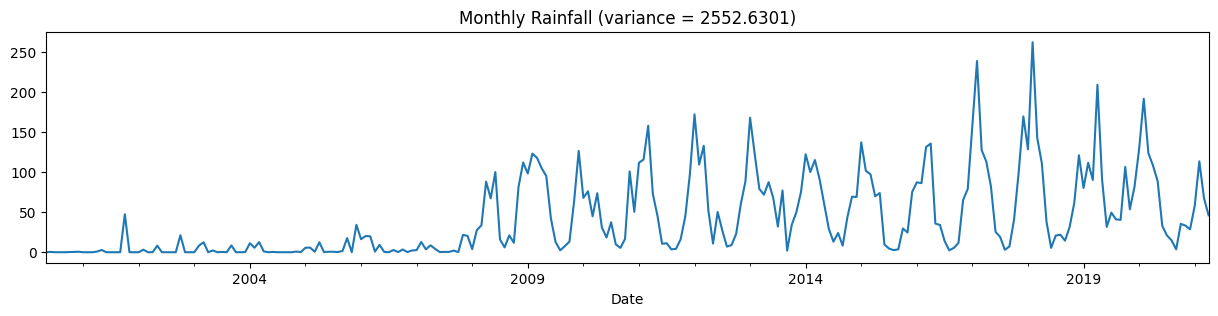

In [23]:
daily = data.copy()
daily.index = pd.to_datetime(daily['Date'])
daily = daily['TOTAL RAINFALL, TIME (mm)']
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Rainfall (variance = %.4f)' % (monthly.var()))

In [24]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

training_mean = training_data.mean(numeric_only=True)
testing_mean = testing_data.mean(numeric_only=True)

training_sd = training_data.std(numeric_only=True)
testing_sd = testing_data.std(numeric_only=True)

print(f"\nMean of Training Data")
print(training_mean)
print(f"\nMean of Testing Data")
print(testing_mean)
print(f"\nStandard Deviation of Training Data")
print(training_sd)
print(f"\nStandard Deviation of Testing Data")
print(testing_sd)

No. of training examples: 43902
No. of testing examples: 10976

Mean of Training Data
TOTAL RAINFALL, TIME (mm)                0.194734
DEW POINT TEMPERATURE (°C)              21.726561
WIND, TIMED DIRECTION (gr) (° (gr))    153.205139
WIND, MAXIMUM gust (m/s)                 3.400421
WIND, HOURLY SPEED (m/s)                 1.164967
height                                 137.702090
dtype: float64

Mean of Testing Data
TOTAL RAINFALL, TIME (mm)                0.202515
DEW POINT TEMPERATURE (°C)              21.732507
WIND, TIMED DIRECTION (gr) (° (gr))    154.513848
WIND, MAXIMUM gust (m/s)                 3.397458
WIND, HOURLY SPEED (m/s)                 1.162017
height                                 137.304439
dtype: float64

Standard Deviation of Training Data
TOTAL RAINFALL, TIME (mm)                1.560335
DEW POINT TEMPERATURE (°C)               2.414853
WIND, TIMED DIRECTION (gr) (° (gr))    104.020333
WIND, MAXIMUM gust (m/s)                 2.388501
WIND, HOURLY SPEED (m/s) 

In [25]:
final_df = data.copy()

# Linear Regression Project & Classification Tree Homework


## a.)


Text(0, 0.5, 'TOTAL RAINFALL, TIME (mm)')

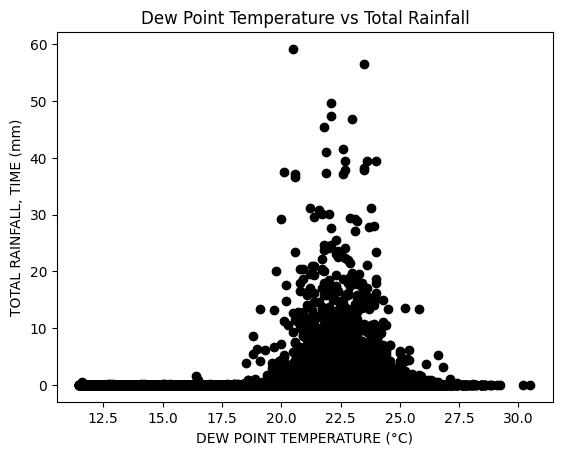

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



X = training_data.loc[:,"DEW POINT TEMPERATURE (°C)"]
y = training_data.loc[:,"TOTAL RAINFALL, TIME (mm)"]
X_test = testing_data.loc[:,"DEW POINT TEMPERATURE (°C)"]
y_test = testing_data.loc[:,"TOTAL RAINFALL, TIME (mm)"]
plt.scatter(X, y,  color='black')
plt.title('Dew Point Temperature vs Total Rainfall')
plt.xlabel('DEW POINT TEMPERATURE (°C)')
plt.ylabel('TOTAL RAINFALL, TIME (mm)')



In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [28]:
# Apply model to the test set
y_pred_test = regr.predict(X_test.values.reshape(-1,1))

Root mean squared error = 1.4177
R-squared = 0.0015


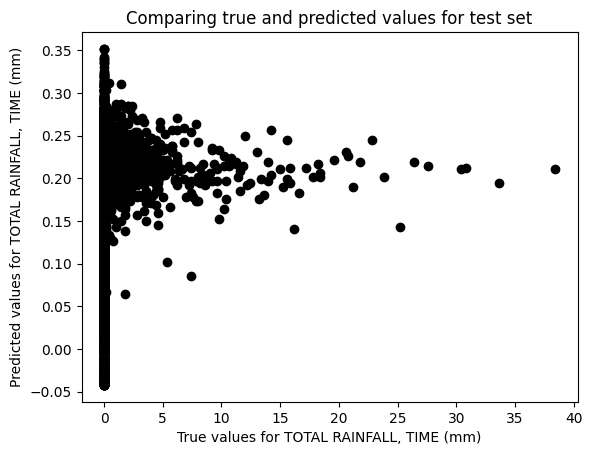

In [29]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for TOTAL RAINFALL, TIME (mm)')
plt.ylabel('Predicted values for TOTAL RAINFALL, TIME (mm)')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Slope =  [0.02315158]
Intercept =  -0.3082705308553598


Text(0, 0.5, 'TOTAL RAINFALL, TIME (mm)')

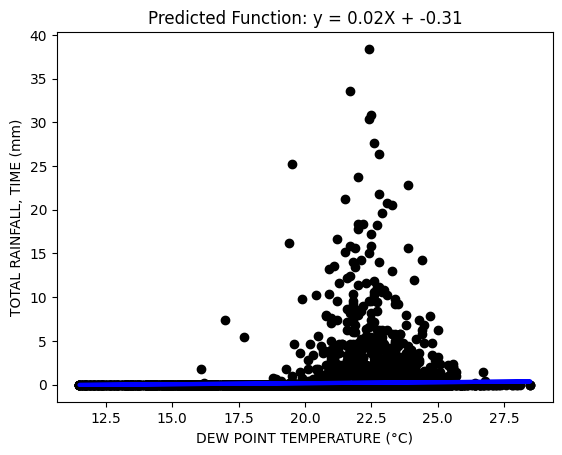

In [30]:
# Display model parameters
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_, regr.intercept_)
plt.title(titlestr)
plt.xlabel('DEW POINT TEMPERATURE (°C)')
plt.ylabel('TOTAL RAINFALL, TIME (mm)')

## b.)


In [53]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data_b = pd.read_csv("hw2-dataset-b.csv")
training_data_b = data_b.sample(frac=0.8, random_state=25)
training_data_b_x = training_data_b['GRE Score']
training_data_b_y = training_data_b['Chance of Admit']

testing_data_b = data_b.drop(training_data_b.index)
testing_data_b_x = testing_data_b['GRE Score']
testing_data_b_y = testing_data_b['Chance of Admit']

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(training_data_b_x, training_data_b_y)

predictY = regr.predict(testing_data_b_x)

ValueError: Expected 2D array, got 1D array instead:
array=[313 322 304 321 330 326 307 334 334 319 324 322 320 303 300 318 293 321
 297 319 331 305 328 310 334 320 324 312 320 300 302 298 308 322 316 324
 305 305 316 323 298 327 314 330 300 340 308 327 324 317 300 326 307 334
 315 311 340 309 328 307 295 334 308 306 316 290 309 303 296 320 330 324
 335 300 301 310 299 318 315 320 319 329 326 314 327 332 322 340 319 304
 312 333 329 321 323 314 312 321 329 323 306 320 297 308 322 302 322 320
 312 310 321 301 314 314 309 315 331 304 314 326 318 321 319 311 306 320
 301 322 311 335 308 322 328 303 329 329 304 321 305 337 299 322 315 320
 336 340 312 324 316 324 311 303 300 314 336 309 329 328 314 316 323 334
 307 295 317 307 326 301 321 323 316 312 312 330 327 307 316 320 318 323
 318 327 311 339 319 320 301 313 325 315 317 317 317 325 318 325 336 327
 314 318 315 324 297 302 314 325 311 300 298 333 322 329 306 296 324 332
 325 325 325 331 310 330 304 314 299 311 322 310 311 307 299 325 297 321
 296 308 321 325 298 330 312 311 304 305 323 299 308 310 307 311 327 323
 327 301 328 311 305 299 328 317 322 317 307 328 317 297 332 310 332 325
 317 304 324 319 301 308 312 305 304 315 337 311 312 301 309 331 301 326
 301 290 295 331 312 319 315 312 300 338 340 317 319 332 312 313 340 316
 327 311 338 314 324 310 338 310 325 300 327 324 324 327 321 327 308 320
 320 313 299 309 311 327 329 311 316 332 298 331 340 316 306 317 330 327
 318 333 302 322 331 323 322 316 300 313 326 336 314 313 323 312 312 326
 313 325 305 321 317 309 308 324 334 317 308 304 312 298 312 294 324 321
 305 340 320 313 298 312 315 324 336 321 300 310 331 319 314 322 318 326
 305 310 330 325].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## c.)


### (i)


In [32]:
id3_df = pd.DataFrame({"color": ["red", "blue", "red", "green", "red", "green"],
                      "shape": ["square", "square", "round", "square", "round", "round"],
                      "size": ["big", "big", "small", "small", "big", "big"],
                      "class": ["+", "+", "-", "-", "+", "-"]}
                      )
id3_df.index = np.arange(1, len(id3_df) + 1)
id3_df

,color,shape,size,class
1,red,square,big,+
2,blue,square,big,+
3,red,round,small,-
4,green,square,small,-
5,red,round,big,+
6,green,round,big,-


$$ Entropy(t) = -\sum_{j}p(j|t)\log_{2}p(j|t) $$

1. Calculating Initial Entropy
Out of 6 instances, 3 are + and 3 are - 
$$ P(+) = -(\frac{3}{6})*\log_{2}(\frac{3}{6}) = 0.5 $$
$$ P(-) = -(\frac{3}{6})*\log_{2}(\frac{3}{6}) = 0.5 $$
$$ Entropy(t) = E(t) = 0.5 + 0.5 + 1

2. For every feature we will calculate entropy and information gain

For attribute color
$$ E(color = red) = -\frac{2}{3}*\log_{2}\frac{2}{3}-\frac{1}{3}*\log_{2}\frac{1}{3} \approx 0.92 $$
$$ E(color = blue) = -\frac{1}{1}*\log_{2}\frac{1}{1}-0 = 0 $$
$$ E(color = green) = -0-\frac{2}{2}*\log_{2}\frac{2}{2} = 0 $$

Average Entropy = $ \frac{3}{6}(0.92) + \frac{1}{6}(0) + \frac{2}{6}(0) = 0.46 $

Gain(Outlook) = 1 - 0.46 = 0.54

For attribute shape

$$ E(shape = square) = -\frac{2}{3}*\log_{2}\frac{2}{3} - \frac{1}{3}*\log_{2}\frac{1}{3} \approx 0.92 $$
$$ E(shape = round) = -\frac{1}{3}*\log_{2}\frac{1}{3}-\frac{2}{3} * \log_{2}\frac{2}{3} = 0.92 $$

Average Entropy = $ \frac{3}{6}(0.92) + \frac{3}{6}(0.92) = 0.92 $

Gain(Outlook) = 1 - 0.92 = 0.08

For attribute size

$$ E(size = big) = -\frac{3}{4}*\log_{2}\frac{3}{4}-\frac{1}{4}*\log_{2}\frac{1}{4} \approx 0.81 $$
$$ E(size = small) = 0 - \frac{2}{2}*\log_{2}\frac{2}{2} = 0 $$

Average Entropy = $ \frac{4}{6}(0.81) + \frac{2}{6}(0) = 0.54 $

Gain(Outlook) = 1 - 0.54 = 0.46

Since the feature "color" has the highest information gain, it provides more information, and therefore will be the first splitting attribute.

Therefore, we need to then draw a decision tree based on each respective color (red, green, blue) and its attributes (size and shape).

### Entropy of Each Attribute

Color of Red vs. Shape

In [33]:
red_shape_df = pd.DataFrame({"Total": [1, 2], "+": [1, 1], "-": [0, 1], "Entropy": [0, 1]})
red_shape_df.index = "Square", "Round"
red_shape_df = red_shape_df.rename_axis("Shape")
red_shape_df

,Total,+,-,Entropy
Shape,,,,
Square,1,1,0,0
Round,2,1,1,1



$$ E(color = red, shape = square) = -\frac{1}{1}\log_{2}\frac{1}{1} - 0 = 0 $$
$$ E(color = red, shape = round) = -\frac{1}{2}\log_{2}\frac{1}{2} - \frac{1}{2}\log_{2}\frac{1}{2} = 1 $$

Average Entropy = $ \frac{1}{3}(0) + \frac{2}{3}(1) = 0.66 $

Initial Entropy $ = 0.92 $

$ Gain = 0.92 - 0.66 = 0.26 $


Color of Red vs. Size

In [34]:
red_size_df = pd.DataFrame({"Total": [2, 1], "+": [2, 0], "-": [0, 1], "Entropy": [0, 0]})
red_size_df.index = "Big", "Small"
red_size_df = red_size_df.rename_axis("Size")
red_size_df

,Total,+,-,Entropy
Size,,,,
Big,2,2,0,0
Small,1,0,1,0



$$ E(color = red, size = big) = -\frac{2}{2}\log_{2}\frac{2}{2} - 0 = 0 $$
$$ E(color = red, size = small) = 0 - \frac{1}{1}\log_{2}\frac{1}{1} = 0 $$

Average Entropy = $ \frac{1}{3}(0) + \frac{2}{3}(1) = 0.66 $

Initial Entropy $ = 0.92 $ 

$ Gain = 0.92 - 0 = 0.92 $


Similarly, since the size attribute has a higher information gain, size will be chosen as the second splitting attribute for our tree.

Also, since we discovered early on that the Entropy for both colors of blue and green are 0, we do not need to calculate the gain values of these both. 

### The decision tree is created as follows

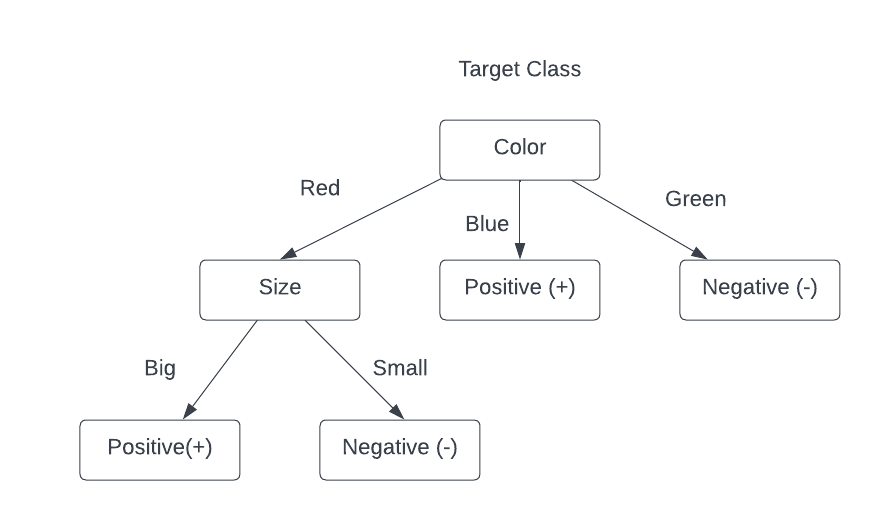

In [35]:
from IPython.display import Image
Image("decision_tree.png")

The rules that we gather from this is:
- If color is blue, target class is positive
- If color is green, target class is negative
- If color is red and size is big, target class is positive
- If color is red and size is small, target class is negative

## (ii)
